In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.drop(['Genre','CustomerID','Age'],axis = 1, inplace= True)

In [6]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


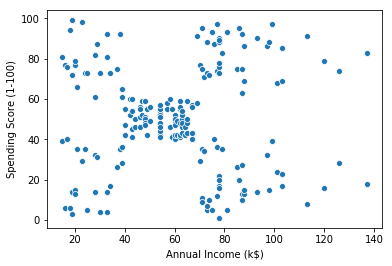

In [7]:
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df)

In [8]:
from sklearn.cluster import KMeans

In [31]:
km = KMeans(n_clusters = 10)   # selected randomly value of n_clusters.

In [32]:
km.fit(df)   # since we don't have segregation of labels and featurs we are going to use full dataset for fit.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [33]:
km.inertia_   # wcss means within cluster sumation of square. That means every cluster will have centroid and it will calculate summation of squre of longest distance. As we increas number of clusters inertia value will decrease.

19704.484807825025

In [34]:
km.cluster_centers_  # for calculating center points of clusters

array([[ 80.5       ,  90.875     ],
       [ 48.1       ,  52.675     ],
       [ 79.73913043,  13.39130435],
       [ 24.58333333,   9.58333333],
       [ 25.0952381 ,  80.04761905],
       [ 63.57142857,  46.57142857],
       [110.88888889,  80.33333333],
       [109.7       ,  22.        ],
       [ 77.78571429,  73.28571429],
       [ 30.        ,  34.61538462]])

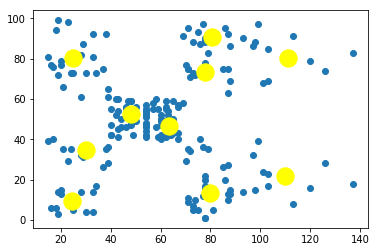

In [35]:
plt.scatter(df.values[:,0], df.values[:,1])
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'yellow', s = 300)  #in order to plot center points of cluster on default dataset scatterplot.

In [29]:
# below is the function to find out and visulise points and to make sure the value of n_clusters.

wcss = [] 
for nclusters in range (1,41) :
    km = KMeans(n_clusters = nclusters)
    km.fit(df)
    wcss.append(km.inertia_)

In [28]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30227.606513152015,
 25094.432930794697,
 21829.135638779822,
 19657.783608703958,
 17515.872164701657,
 15810.838613705502,
 14262.45707070707,
 12746.969092182328,
 11660.148739478913,
 10882.426286694315,
 10372.236725149156,
 9198.49941471572,
 8615.797712560245,
 8100.035590798091,
 7520.242321432475,
 7372.175074925075,
 6786.436011361359,
 6543.186535686536,
 6188.970998057706,
 5832.745277598218,
 5512.474801587301,
 5288.901872718785,
 4935.49474789916,
 4742.232792207793,
 4430.02573953824,
 4089.342135642136,
 4187.727128427128,
 3899.3489177489173,
 3703.3266594516595,
 3538.4278915528917,
 3190.411652236652,
 3150.970682095682,
 2932.4263347763344,
 2877.928715728716]

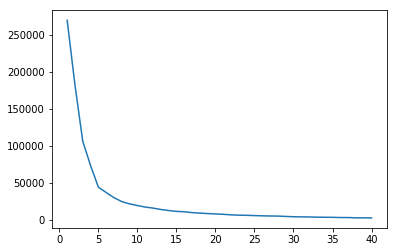

In [30]:
plt.plot(range(1,41), wcss)

In [36]:
# from the above plot we can see that value of n_clusters will be 5

In [37]:
km =KMeans(n_clusters = 5)
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
clusters = km.predict(df)

In [40]:
df['clusters'] = clusters   # created column clusters in dataset

In [41]:
df

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
5,17,76,2
6,18,6,4
7,18,94,2
8,19,3,4
9,19,72,2


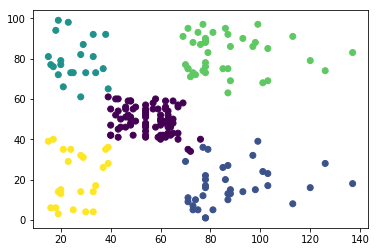

In [43]:
plt.scatter (df.values[:,0], df.values[:,1], c = df['clusters'])

In [44]:
z = df['clusters']

In [45]:
z

0      4
1      2
2      4
3      2
4      4
5      2
6      4
7      2
8      4
9      2
10     4
11     2
12     4
13     2
14     4
15     2
16     4
17     2
18     4
19     2
20     4
21     2
22     4
23     2
24     4
25     2
26     4
27     2
28     4
29     2
      ..
170    1
171    3
172    1
173    3
174    1
175    3
176    1
177    3
178    1
179    3
180    1
181    3
182    1
183    3
184    1
185    3
186    1
187    3
188    1
189    3
190    1
191    3
192    1
193    3
194    1
195    3
196    1
197    3
198    1
199    3
Name: clusters, Length: 200, dtype: int32

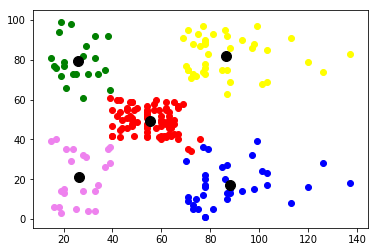

In [59]:
# from the above plot it is difficult to understand which color is for points so will apply condition on clusters column values and will apply colors 

plt.scatter(df.values[z==0,0], df.values[z==0,1], c = 'red')
plt.scatter(df.values[z==1,0], df.values[z==1,1], c = 'blue')
plt.scatter(df.values[z==2,0], df.values[z==2,1], c = 'green')
plt.scatter(df.values[z==3,0], df.values[z==3,1], c = 'yellow')
plt.scatter(df.values[z==4,0], df.values[z==4,1], c = 'violet')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'black', s = 100)  # it will create centroids.